<a href="https://colab.research.google.com/github/real-horizon02/Student-Attendance-Analyzer/blob/main/Student_Attendance_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

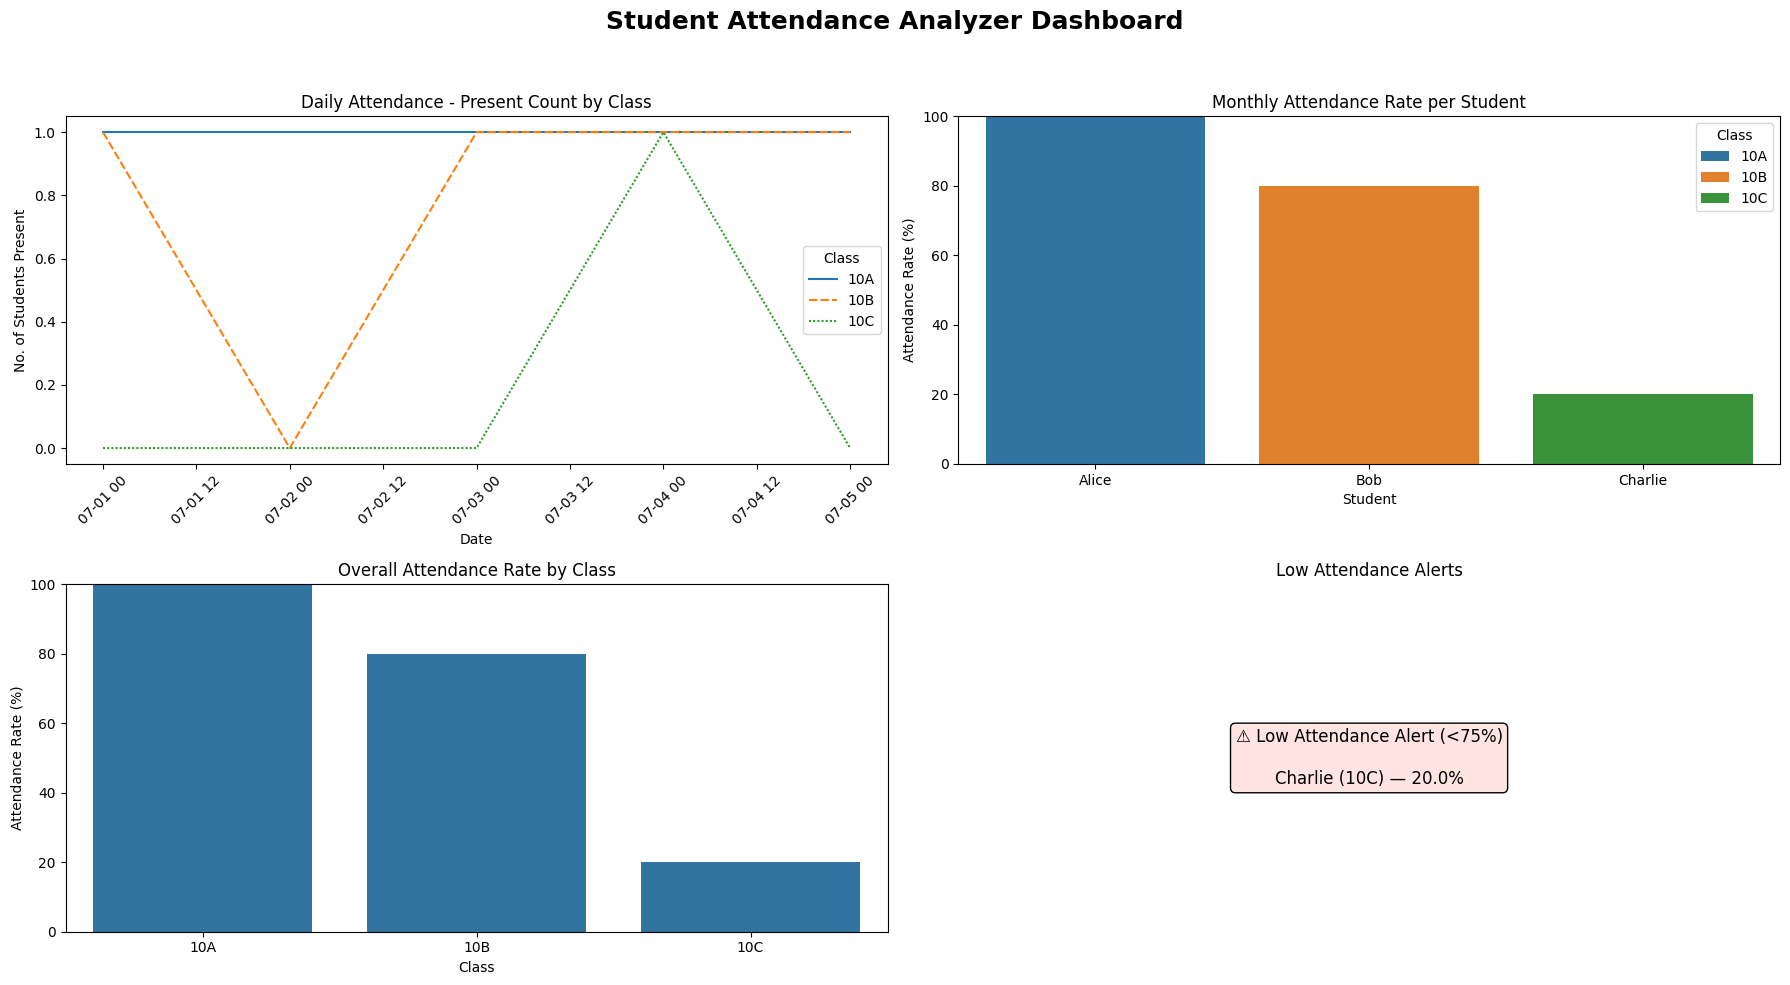

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file

df = pd.read_csv('student_attendance_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

# DAILY ATTENDANCE SUMMARY

daily_summary = df.groupby(['Date', 'Class'])['Status'].value_counts().unstack().fillna(0)

# MONTHLY RATE PER STUDENT

monthly_rate = df.groupby(['Month', 'Class', 'Student'])['Status'].value_counts().unstack().fillna(0)
monthly_rate['Attendance Rate (%)'] = (monthly_rate['Present'] / (monthly_rate['Present'] + monthly_rate['Absent'])) * 100

# CLASS-WISE OVERALL RATE

class_summary = df.groupby(['Class', 'Status']).size().unstack().fillna(0)
class_summary['Attendance Rate (%)'] = (class_summary['Present'] / (class_summary['Present'] + class_summary['Absent'])) * 100

# ALERT LOGIC

alerts = monthly_rate[monthly_rate['Attendance Rate (%)'] < 75]

# DASHBOARD DISPLAY

plt.figure(figsize=(18, 10))
plt.suptitle("Student Attendance Analyzer Dashboard", fontsize=18, fontweight='bold')

# Plot 1: Daily Attendance Trend

plt.subplot(2, 2, 1)
sns.lineplot(data=daily_summary['Present'].unstack().fillna(0))
plt.title('Daily Attendance - Present Count by Class')
plt.xlabel('Date')
plt.ylabel('No. of Students Present')
plt.xticks(rotation=45)

# Plot 2: Monthly Attendance per Student

plt.subplot(2, 2, 2)
sns.barplot(data=monthly_rate.reset_index(), x='Student', y='Attendance Rate (%)', hue='Class')
plt.title('Monthly Attendance Rate per Student')
plt.ylim(0, 100)
plt.ylabel('Attendance Rate (%)')
plt.xlabel('Student')

# Plot 3: Overall Class-wise Attendance

plt.subplot(2, 2, 3)
sns.barplot(data=class_summary.reset_index(), x='Class', y='Attendance Rate (%)')
plt.title('Overall Attendance Rate by Class')
plt.ylim(0, 100)
plt.ylabel('Attendance Rate (%)')
plt.xlabel('Class')

# Plot 4: Low Attendance Alert Panel

plt.subplot(2, 2, 4)
if not alerts.empty:
    alert_text = "\n".join(
        [f"{idx[2]} ({idx[1]}) — {row['Attendance Rate (%)']:.1f}%"
         for idx, row in alerts.iterrows()]
    )
    plt.text(0.5, 0.5, f"⚠️ Low Attendance Alert (<75%)\n\n{alert_text}",
             fontsize=12, ha='center', va='center', wrap=True, bbox=dict(boxstyle="round", facecolor="mistyrose"))
else:
    plt.text(0.5, 0.5, "All students above 75% attendance!",
             fontsize=12, ha='center', va='center', bbox=dict(boxstyle="round", facecolor="honeydew"))
plt.axis('off')
plt.title('Low Attendance Alerts')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
